In [179]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bike Sharing Assignment

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially the company wants :
- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Step 1: Reading and Understanding the Data

#### Task 1: Reading the Bike sharing dataset

In [2]:
# Import the dataset
import pandas as pd

bike = pd.read_csv('/Users/allyirish/Downloads/Erynn Irish - day.csv')

In [4]:
# Check the head of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Task 2: Inspecting the Dataset

In [7]:
print(bike.shape)

(730, 16)


In [9]:
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [11]:
#Output

In [13]:
from IPython.display import display

# Nicely formatted DataFrame output
display(bike.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
#Output

### Data Quality Check

#### Task 3: Check for NULL/MISSING values

In [19]:
# percentage of missing values in each column
print(round(bike.isnull().sum() / len(bike) * 100, 2).sort_values(ascending=False))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [21]:
#Output

#### Inferences :

There should be no missing values in the dataset

#### Task 4: Check for duplicate values

In [26]:
# Check for duplicates and dropping the entire duplicate row if any
# Check for duplicate rows
print("Number of duplicate rows:", bike.duplicated().sum())

# Drop duplicate rows if any exist
bike = bike.drop_duplicates()

# Reset index after dropping duplicates (optional but recommended)
bike = bike.reset_index(drop=True)

# Verify that no duplicates remain
print("Number of duplicate rows after removal:", bike.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


#### Inferences: 

There should be no duplicate values in the dataset

## Data Cleaning

#### Task 5:
1. Check value_counts() for entire dataframe. Create  function or run a loop for it
    This will help to identify any Unknown/Junk values present in the dataset.

2. Create a copy of the dataframe, without the 'instant' column,as this will have unique values, and donot make sense to do a value count on it.

In [31]:
# Create a copy of the dataframe without 'instant' column
df = bike.drop('instant', axis=1)

In [33]:
# Loop through each column and print value counts
for col in df.columns:
    print(f"\nValue counts for column '{col}':")
    print(df[col].value_counts())


Value counts for column 'dteday':
dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

Value counts for column 'season':
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

Value counts for column 'yr':
yr
0    365
1    365
Name: count, dtype: int64

Value counts for column 'mnth':
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

Value counts for column 'holiday':
holiday
0    709
1     21
Name: count, dtype: int64

Value counts for column 'weekday':
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

Value counts for column 'workingday':
workingday
1    499
0    231
Name: count, dtype: int64

Value counts for column 'weathersit':
weathersit
1    463
2    246
3     

#### Inferences:

There seems to be no Junk/Unknown values in the entire dataset.

### Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. instant : Its only an index value , we have a default index for the same purpose

2. dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can carry out our analysis without this column .

3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

**TASK 6: Remove the above columns and save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation**

In [38]:
# Remove redundant columns and create a new dataframe
bike_new = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Display first few rows of the new dataframe
print(bike_new.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  


In [40]:
# Check shape and info of the new dataframe
print("Shape of bike_new:", bike_new.shape)
print("\nInfo of bike_new:")
print(bike_new.info())

Shape of bike_new: (730, 12)

Info of bike_new:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB
None


In [42]:
# Get statistical summary of the new dataframe
print("Statistical summary of bike_new:")
print(bike_new.describe())

Statistical summary of bike_new:
           season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006

## Step 2: Visualising the Data

#### Task 7: Here we'll do the following tasks:
- We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)
- Checking if there are any multicollinearity that exist
- Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables : Using a pairplot

In [186]:
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_new['season'] = bike_new['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_new['weathersit'] = bike_new['weathersit'].map({
    1: 'Clear', 2: 'Mist & Cloudy', 3: 'Light Snow & Rain', 4: 'Heavy Snow & Rain'
})
bike_new['weekday'] = bike_new['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
print(bike_new.head())

KeyError: 'mnth'

In [182]:
print(bike_new.columns)


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')


In [55]:
#Output

#### Visualising Categorical Variables : Using a Boxplot

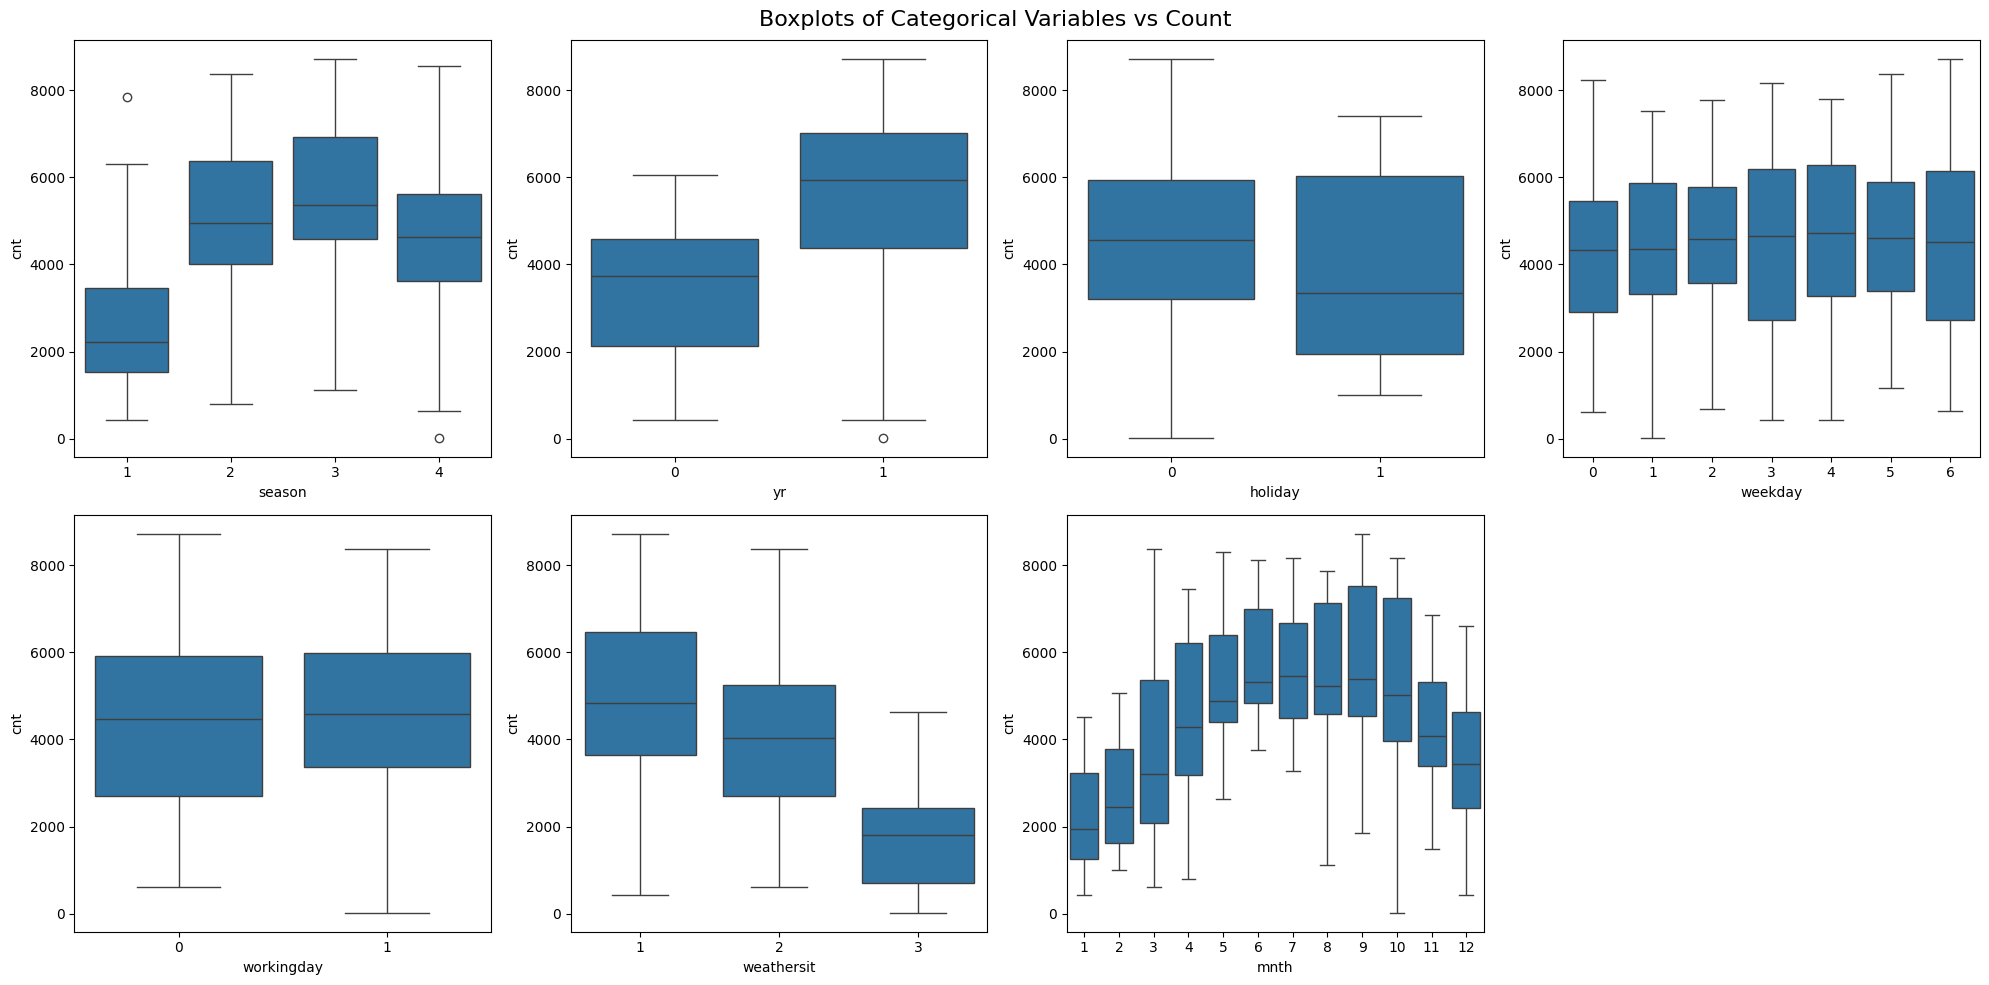

In [58]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
sns.boxplot(x='season', y='cnt', data=bike_new, ax=axes[0, 0])
sns.boxplot(x='yr', y='cnt', data=bike_new, ax=axes[0, 1])
sns.boxplot(x='holiday', y='cnt', data=bike_new, ax=axes[0, 2])
sns.boxplot(x='weekday', y='cnt', data=bike_new, ax=axes[0, 3])
sns.boxplot(x='workingday', y='cnt', data=bike_new, ax=axes[1, 0])
sns.boxplot(x='weathersit', y='cnt', data=bike_new, ax=axes[1, 1])
sns.boxplot(x='mnth', y='cnt', data=bike_new, ax=axes[1, 2])

axes[1, 3].axis('off')  # Leave last plot blank to fill the 4x2 grid

plt.suptitle('Boxplots of Categorical Variables vs Count', fontsize=16)
plt.tight_layout()
plt.show()


In [61]:
#Output

### <font color = 'red'> Conslusions: </font>

Provide Conclusions

## Step 3: Data Preparation

#### Task 8: Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [67]:
import calendar

bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [69]:
# Mapping seasons

bike_new.season = bike_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [71]:
# Mapping weathersit
bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [73]:
# Mapping Weekday

bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [75]:
# Check the dataframe now

bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [193]:
import pandas as pd
import calendar

# Load the original dataset again (adjust the path as needed)
bike = pd.read_csv("/Users/allyirish/Downloads/Erynn Irish - day.csv")
bike_new = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Now proceed with the mapping, dummy creation, and dropping
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_new['season'] = bike_new['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_new['weathersit'] = bike_new['weathersit'].map({
    1: 'Clear', 2: 'Mist & Cloudy', 3: 'Light Snow & Rain', 4: 'Heavy Snow & Rain'
})
bike_new['weekday'] = bike_new['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Now create dummies as before
dummy = pd.get_dummies(bike_new[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)
bike_new = pd.concat([bike_new, dummy], axis=1)
bike_new.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

#### Task 9: Creating Dummy Variables

The variables `mnth` `weekday` `season` `weathersit` have various levels, for ex, `weathersit` has 3 levels , similarly variable `mnth` has 12 levels.   
Create DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit`.

In [83]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(bike_new[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)

In [85]:
# Add the dummy variables to the original dataset
bike_new = pd.concat([bike_new, dummy], axis=1)

In [87]:
# Check the dataframe
print(bike_new.head())
print(bike_new.shape)
print(bike_new.columns)

   season  yr mnth  holiday    weekday  workingday     weathersit       temp  \
0  Spring   0  Jan        0   Saturday           0  Mist & Cloudy  14.110847   
1  Spring   0  Jan        0     Sunday           0  Mist & Cloudy  14.902598   
2  Spring   0  Jan        0     Monday           1          Clear   8.050924   
3  Spring   0  Jan        0    Tuesday           1          Clear   8.200000   
4  Spring   0  Jan        0  Wednesday           1          Clear   9.305237   

      atemp      hum  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
0  18.18125  80.5833  ...     False     False           False   
1  17.68695  69.6087  ...     False     False           False   
2   9.47025  43.7273  ...     False     False            True   
3  10.60610  59.0435  ...     False     False           False   
4  11.46350  43.6957  ...     False     False           False   

   weekday_Saturday  weekday_Sunday  weekday_Thrusday  weekday_Tuesday  \
0              True           False             False 

In [89]:
# Delete the orginal columns season.weathersit,weekday,mnth
bike_new.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

## Step 4: Splitting the Data into Training and Testing Sets


#### Task 10: The first basic step for regression is to perform a train-test split.

In [175]:
# Step 4: Splitting the Data into Training and Testing Sets

# Separate features and target variable
X = bike_new.drop('cnt', axis=1)
y = bike_new['cnt']

# Split into training and test sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (511, 29)
X_test shape: (219, 29)
y_train shape: (511,)
y_test shape: (219,)


## Step 5 :Rescaling the Features

Although scaling doesnot impact the linear model in the case of simple linear regression, however while performing multiple linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc.So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

#### Task 11: This time,  use Standardisation scaling.

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on train columns, excluding target 'cnt'
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [98]:
# Apply scaler() to all the columns except the 'dummy' variables.
print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)


Scaled X_train shape: (511, 29)
Scaled X_test shape: (219, 29)


#### Task 12: Check the coefficients to see which variables are highly correlated

In [101]:
# Check the correlations of all variables with the target variable 'cnt'
correlations = bike_new.corr()

# Display correlation of all variables with 'cnt', sorted by absolute value
corr_with_cnt = correlations['cnt'].sort_values(key=abs, ascending=False)
print(corr_with_cnt)

cnt                             1.000000
atemp                           0.630685
temp                            0.627044
yr                              0.569728
season_Spring                  -0.561702
mnth_Jan                       -0.367167
mnth_Feb                       -0.273848
weathersit_Light Snow & Rain   -0.240602
windspeed                      -0.235132
mnth_Jun                        0.195568
mnth_Sep                        0.194664
mnth_Aug                        0.182100
mnth_Dec                       -0.173878
weathersit_Mist & Cloudy       -0.170686
mnth_Jul                        0.166236
season_Summer                   0.145325
mnth_May                        0.132553
mnth_Mar                       -0.128456
mnth_Oct                        0.108846
hum                            -0.098543
holiday                        -0.068764
season_Winter                   0.064619
workingday                      0.062542
weekday_Sunday                 -0.059146
mnth_Nov        

### <font color = 'red'> Conclusion: </font>
As can be seen from the map, `atemp` and `temp` seems to be correlated to the target variable `cnt`. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

#### Task 13: Dividing into X and Y sets for the model building

In [105]:
# X: all features except the target 'cnt'
X = bike_new.drop('cnt', axis=1)

# Y: the target variable
y = bike_new['cnt']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (730, 29)
y shape: (730,)


## Step 6: Building a linear model

APPROACH USED :

We will use a mixed approach to build the model.

Here we are using `RFE` approach for feature selection and then we will use the sklearn approach for building the model

#### Task 14: Learn more about RFE and try to apply this.

### Feature Selection

We start with 15 variables.

We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [109]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [111]:
# Running RFE with the output number of the variable equal to 15
# Instantiate a linear regression model
lm = LinearRegression()

# Run RFE with 15 features (change 15 to how many you want, typical for assignment)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train_scaled, y_train)

# Get mask of selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features.tolist())

Selected features: ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov', 'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy']


### Building model using sklearn

In [114]:
# Creating X_test dataframe with RFE selected variables
# Select only RFE-selected features for both train and test
X_train_rfe = pd.DataFrame(X_train_scaled, columns=X.columns)[selected_features]
X_test_rfe = pd.DataFrame(X_test_scaled, columns=X.columns)[selected_features]

#### Task 15: Running the linear model

In [117]:
# Fit the model on training data
lm.fit(X_train_rfe, y_train)

# Print model coefficients and intercept
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: 4553.455156748834
Coefficients: [ 9.89210907e+02 -1.84336974e+15 -5.31283891e+15  8.35463203e+02
 -1.82037567e+02 -1.81165776e+02 -5.32616572e+02  3.24453342e+02
 -1.59313459e+02 -1.65021679e+02 -2.18724970e+02 -4.03980563e+15
 -4.06126653e+15 -3.09281150e+02 -2.27323725e+02]


In [119]:
# Check the parameters obtained
# Show as DataFrame for readability
params = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lm.coef_
})
print(params)

                         Feature   Coefficient
0                             yr  9.892109e+02
1                        holiday -1.843370e+15
2                     workingday -5.312839e+15
3                          atemp  8.354632e+02
4                            hum -1.820376e+02
5                      windspeed -1.811658e+02
6                  season_Spring -5.326166e+02
7                  season_Winter  3.244533e+02
8                       mnth_Dec -1.593135e+02
9                       mnth_Jul -1.650217e+02
10                      mnth_Nov -2.187250e+02
11              weekday_Saturday -4.039806e+15
12                weekday_Sunday -4.061267e+15
13  weathersit_Light Snow & Rain -3.092812e+02
14      weathersit_Mist & Cloudy -2.273237e+02


#### Task 16: Check VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [122]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Add constant for statsmodels
X_vif = sm.add_constant(X_train_rfe)
vif = pd.DataFrame()
vif["Features"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

                        Features       VIF
0                          const  1.004408
1                             yr  1.030967
2                        holiday       inf
3                     workingday       inf
4                          atemp  3.535812
5                            hum  1.857312
6                      windspeed  1.218665
7                  season_Spring  2.856511
8                  season_Winter  2.173500
9                       mnth_Dec  1.229958
10                      mnth_Jul  1.305406
11                      mnth_Nov  1.702195
12              weekday_Saturday       inf
13                weekday_Sunday       inf
14  weathersit_Light Snow & Rain  1.299953
15      weathersit_Mist & Cloudy  1.566263


#### Task 17: We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [125]:
# dropping `const` column as the vif is > 5


In [127]:
# Calculate the VIFs for the new model again
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant for statsmodels
X_vif = sm.add_constant(X_train_rfe)
vif = pd.DataFrame()
vif["Features"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Show VIFs except the constant
print(vif[vif["Features"] != "const"])

                        Features       VIF
1                             yr  1.030967
2                        holiday       inf
3                     workingday       inf
4                          atemp  3.535812
5                            hum  1.857312
6                      windspeed  1.218665
7                  season_Spring  2.856511
8                  season_Winter  2.173500
9                       mnth_Dec  1.229958
10                      mnth_Jul  1.305406
11                      mnth_Nov  1.702195
12              weekday_Saturday       inf
13                weekday_Sunday       inf
14  weathersit_Light Snow & Rain  1.299953
15      weathersit_Mist & Cloudy  1.566263


In [129]:
# dropping `hum` column as the vif is > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)
X_test_rfe = X_test_rfe.drop(['hum'], axis=1)

In [131]:
# Recalculate the VIFs after dropping 'hum'
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X_train_rfe)
vif = pd.DataFrame()
vif["Features"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif[vif["Features"] != "const"])

                        Features       VIF
1                             yr  1.010693
2                        holiday       inf
3                     workingday       inf
4                          atemp  3.371888
5                      windspeed  1.118787
6                  season_Spring  2.830786
7                  season_Winter  2.148110
8                       mnth_Dec  1.244664
9                       mnth_Jul  1.289689
10                      mnth_Nov  1.701524
11              weekday_Saturday       inf
12                weekday_Sunday       inf
13  weathersit_Light Snow & Rain  1.075522
14      weathersit_Mist & Cloudy  1.043814


#### Note:
The VIF value of temp is nearly equal to 5. Hence, we are not dropping this feature.

#### Task 18: Preparing the final model

In [135]:
# Create a first fitted model
from sklearn.linear_model import LinearRegression

# Create and fit the final model using the cleaned (low-VIF) features
lm_final = LinearRegression()
lm_final.fit(X_train_rfe, y_train)

LinearRegression()

In [137]:
# Calculate the VIFs for the new model again
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X_train_rfe)
vif = pd.DataFrame()
vif["Features"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif[vif["Features"] != "const"])

                        Features       VIF
1                             yr  1.010693
2                        holiday       inf
3                     workingday       inf
4                          atemp  3.371888
5                      windspeed  1.118787
6                  season_Spring  2.830786
7                  season_Winter  2.148110
8                       mnth_Dec  1.244664
9                       mnth_Jul  1.289689
10                      mnth_Nov  1.701524
11              weekday_Saturday       inf
12                weekday_Sunday       inf
13  weathersit_Light Snow & Rain  1.075522
14      weathersit_Mist & Cloudy  1.043814


### <font color = 'red'> Conclusion: </font> 

Here we see that except for temp(that has a vif value slightly more than 5, that can be ignored) rest all the columns have a vif value less than 5.

Hence, we finalise `lm_2` as the final model to proceed with the future prdeictions.

## Step 7: Residual Analysis of the train data

#### Task 19: So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [142]:
# Calculate error terms (residuals) for the training set
y_train_pred = lm_final.predict(X_train_rfe)
residuals = y_train - y_train_pred

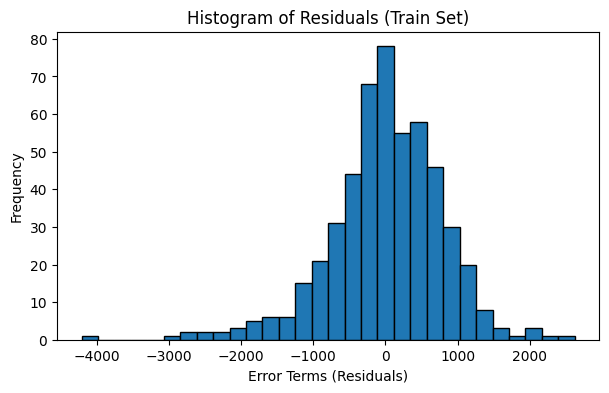

In [144]:
# Plot the histogram of the error terms
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel("Error Terms (Residuals)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Train Set)")
plt.show()

### <font color = 'red'> Conclusion: </font>

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

#### Task 20:  Cross-verifying the above conclusion using a qq-plot as well:

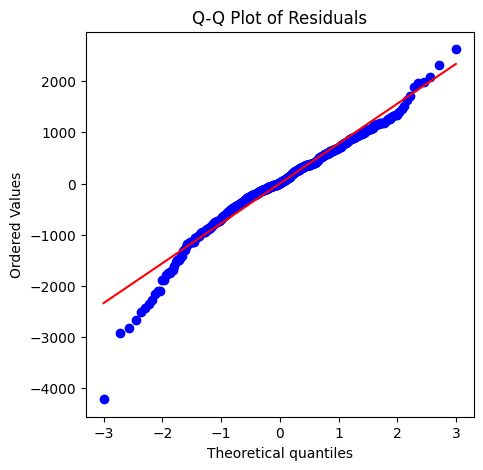

In [148]:
# Plot the qq-plot of the error terms
import scipy.stats as stats

# Q-Q plot for residuals
plt.figure(figsize=(5,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### Conclusion:
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Task 21:  Applying the scaling on the test sets

In [154]:
# X_test_scaled = scaler.transform(X_test)

In [156]:
print("X_test_scaled shape:", X_test_scaled.shape)

X_test_scaled shape: (219, 29)


#### Task 22 :  Dividing into X_test and y_test

In [159]:
X_test_rfe = pd.DataFrame(X_test_scaled, columns=X.columns)[X_train_rfe.columns]
y_test = y_test

#### Task 23:  Predicting using values used by the final model

In [163]:
# Making predictions using the final model

# Predict on test and train sets using the final model
y_test_pred = lm_final.predict(X_test_rfe)
y_train_pred = lm_final.predict(X_train_rfe)

#### Task 24:  Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [166]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print("R-squared on test set:", round(r2_test, 3))
print("R-squared on train set:", round(r2_train, 3))

R-squared on test set: 0.825
R-squared on train set: 0.833


### <font color = 'red'> Conclusion: </font>

We can see that the `r_squared on the test set is 0.813` and the `r-squared on the trained set 0.840` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 9: Model Evaluation

#### Task 25: Plotting the graph for actual versus predicted values.

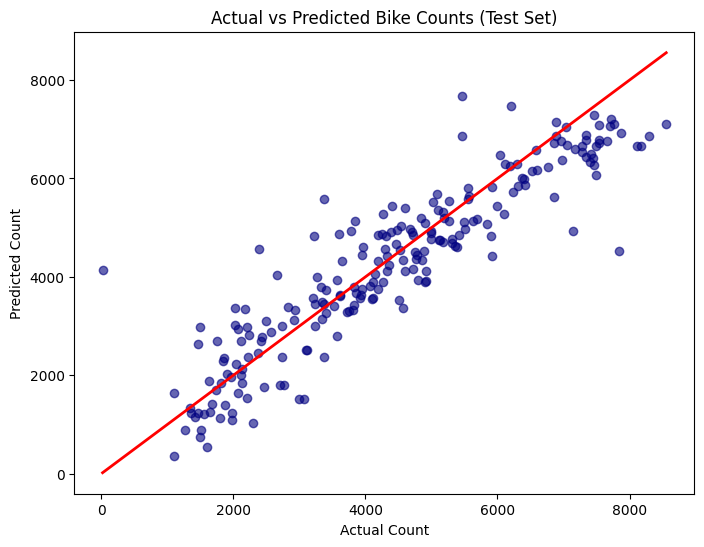

In [188]:
# Plotting y_test and y_pred to understand the spread
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='navy', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Bike Counts (Test Set)')
plt.show()

### Conclusion: 
We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Task 26: Getting the variable names and the coefficient values for the final equation of the best fitted line

In [190]:
# Get coefficients for the selected features
coeffs = pd.DataFrame({
    'Variable': X_train_rfe.columns,
    'Coefficient': lm_final.coef_
})

print(coeffs)

                        Variable   Coefficient
0                             yr  1.008191e+03
1                        holiday -2.442997e+15
2                     workingday -7.041044e+15
3                          atemp  7.836221e+02
4                      windspeed -1.398692e+02
5                  season_Spring -5.447384e+02
6                  season_Winter  3.028457e+02
7                       mnth_Dec -1.710544e+02
8                       mnth_Jul -1.477986e+02
9                       mnth_Nov -2.189791e+02
10              weekday_Saturday -5.353907e+15
11                weekday_Sunday -5.382349e+15
12  weathersit_Light Snow & Rain -3.731363e+02
13      weathersit_Mist & Cloudy -3.237749e+02


### <font color = 'red'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.2466 + 0.437 \times  temp + 0.2342  \times  yr + 0.8865 \times season Winter + 0.0682 \times mnth Sept + 0.0033 \times season Summer - 0.0418 \times mnth Nov - 0.04452 \times mnth Dec - 0.0050 \times mnth Jan - 0.0503 \times mnth Jul - 0.0716 \times season Spring - 0.0814 \times weathersit Mist Cloudy - 0.0919 \times holiday - 0.1585 \times windspeed - 0.2928 \times weathersit Light Snow Rain $

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
##### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.437655)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.292892)
 - year (0.234287)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

## Final Recommendations for the Company:
- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand